In [1]:
import os, sys
sys.path.append(os.path.abspath("../src/tf"))
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from gan import MnistCWGAN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.reset_default_graph()

In [4]:
sess = tf.Session()
gan = MnistCWGAN(sess, learning_rate=0.0001, batch_size=64)
sess.run(gan.init_vars)

Instructions for updating:
Use `tf.variables_initializer` instead.


In [5]:
gan.load("models/wcgangp-mnist.ckpt")

INFO:tensorflow:Restoring parameters from models/wcgangp-mnist.ckpt


(-0.5, 279.5, 279.5, -0.5)

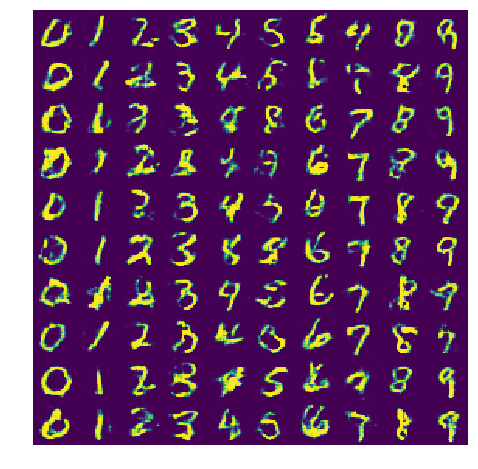

In [6]:
noise = np.random.normal(0, 1, (100, 64))
conditions = to_categorical(
    np.concatenate([np.arange(10) for _ in range(10)]))

images = gan.generate([noise, conditions])

plt.figure(figsize=(10, 8))
plt.imshow(np.concatenate(
    np.concatenate(
        images.reshape(10, 10, 28, 28),
        axis=1
    ),
    axis=1
))
plt.axis("off")